In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objs as go

In [18]:
dataset = pd.read_csv(r"C:\Users\Darsh\Desktop\DS Project\Corona\dataset\covid_19_data.csv")
recovered = pd.read_csv(r"C:\Users\Darsh\Desktop\DS Project\data\recovered.csv")
covid_19_data = pd.read_csv(r"C:\Users\Darsh\Desktop\DS Project\data\date_wise_data.csv")
confirmed_df = pd.read_csv(r"C:\Users\Darsh\Desktop\DS Project\data\confirmed.csv")
recovered_df = pd.read_csv(r"C:\Users\Darsh\Desktop\DS Project\data\recovered.csv")
deaths_df = pd.read_csv(r"C:\Users\Darsh\Desktop\DS Project\data\deaths.csv")
individual_details = pd.read_csv(r"C:\Users\Darsh\Desktop\DS Project\data\archive (1)\patients_data.csv")


c:\users\darsh\appdata\local\programs\python\python38\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning:

Columns (4,12,13,14,15,18,19) have mixed types.Specify dtype option on import or set low_memory=False.



In [4]:
dataset.head()

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
1,2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
2,3,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
3,4,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
4,5,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0


In [5]:
dataset.columns

Index(['SNo', 'ObservationDate', 'Province/State', 'Country/Region',
       'Last Update', 'Confirmed', 'Deaths', 'Recovered'],
      dtype='object')

In [6]:
dataset.describe()

,SNo,Confirmed,Deaths,Recovered
count,116805.000000,1.168050e+05,116805.000000,1.168050e+05
mean,58403.000000,1.908217e+04,777.745473,1.117002e+04
std,33718.843434,5.825465e+04,2859.184068,6.258701e+04
min,1.000000,0.000000e+00,0.000000,0.000000e+00
25%,29202.000000,2.450000e+02,3.000000,4.000000e+00
50%,58403.000000,2.148000e+03,42.000000,4.260000e+02
75%,87604.000000,1.037400e+04,331.000000,3.829000e+03
max,116805.000000,1.242770e+06,42072.000000,2.670256e+06


In [7]:
dataset.isnull().sum()

SNo                    0
ObservationDate        0
Province/State     35353
Country/Region         0
Last Update            0
Confirmed              0
Deaths                 0
Recovered              0
dtype: int64

In [8]:
dataset["Province/State"].fillna("Unknown", inplace = True) 
dataset.isnull().sum()

SNo                0
ObservationDate    0
Province/State     0
Country/Region     0
Last Update        0
Confirmed          0
Deaths             0
Recovered          0
dtype: int64

In [22]:
country = dataset.groupby('Country/Region')['Confirmed'].sum()
country = country.to_frame()

In [25]:
Top10_country = country['Confirmed'].nlargest(10)
Top10_country

Country/Region
US              557588267.0
Brazil          301632363.0
India           238342983.0
Russia          101499236.0
Peru             53724353.0
Spain            53020511.0
Mexico           47896651.0
UK               47036878.0
South Africa     45921178.0
Italy            42231668.0
Name: Confirmed, dtype: float64

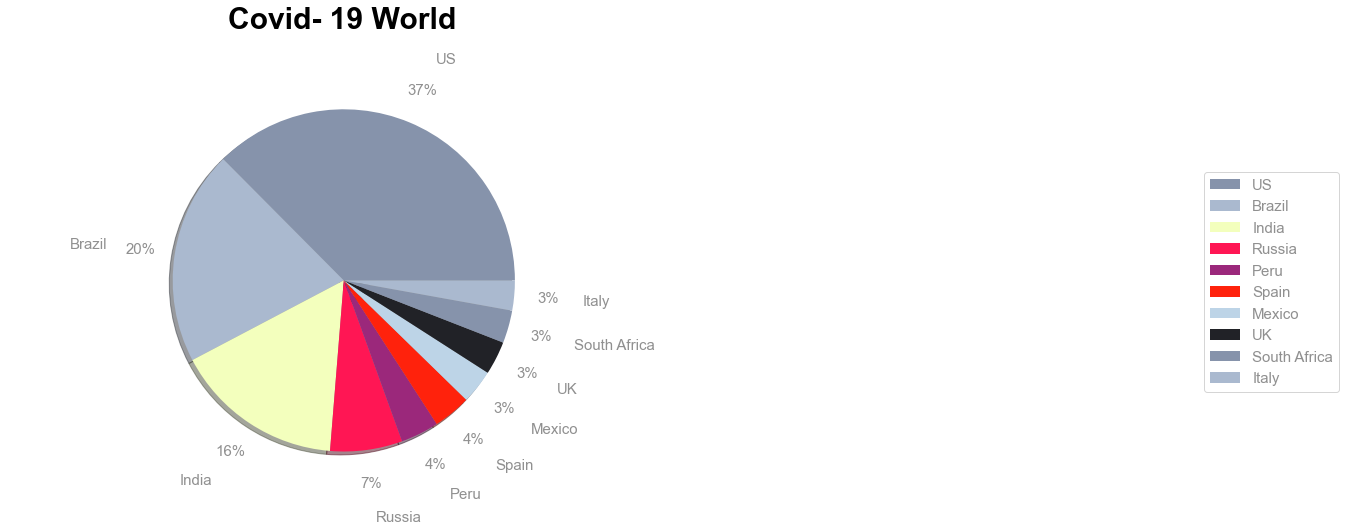

<Figure size 1440x1080 with 0 Axes>

In [27]:
fig, ax = plt.subplots(figsize = (12,7))

plt.figure(figsize =(20, 15)) 
plt.rcParams['font.sans-serif'] = 'Arial'
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['text.color'] = '#909090'
plt.rcParams['axes.labelcolor']= '#909090'
plt.rcParams['xtick.color'] = '#909090'
plt.rcParams['ytick.color'] = '#909090'
plt.rcParams['font.size']= 15

color_palette_list = ['#8693AB','#AAB9CF', '#F3FFBD', '#FF1654', '#9B287B', '#FF220C', '#BDD4E7', '#212227', '#637074',   
                       '#FF3622']

c_name = ['US','Brazil','India','Russia','Peru', 'Spain', 'Mexico', 'UK', 'South Africa', 'Italy']

ax.pie(Top10_country, labels=c_name,  
       colors=color_palette_list[0:8], autopct='%1.0f%%', 
       shadow=True, startangle=0,   
       pctdistance=1.2,labeldistance=1.4)
ax.axis('equal')
ax.set_title("Covid- 19 World",fontsize = 30, pad = 60, fontweight ="bold")
ax.legend(frameon=True, bbox_to_anchor=(2,0.8))



Text(0.5, 0, 'Country')

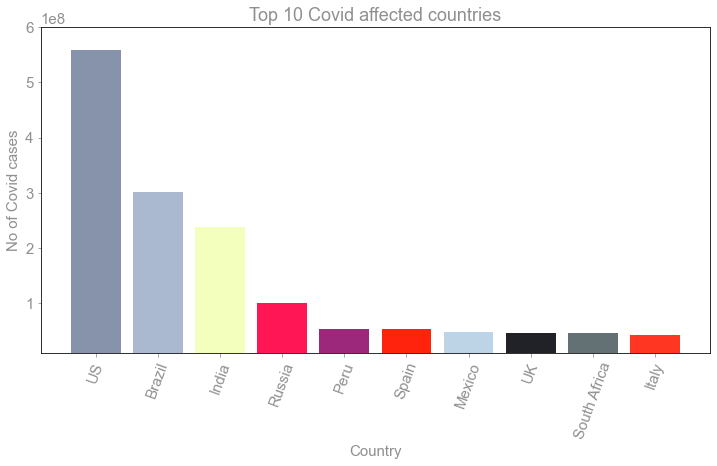

In [44]:
fig, ax = plt.subplots(figsize = (12,6))
plt.rcParams['font.sans-serif'] = 'Arial'
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['text.color'] = '#909090'
plt.rcParams['axes.labelcolor']= '#909090'
plt.rcParams['xtick.color'] = '#909090'
plt.rcParams['ytick.color'] = '#909090'
plt.rcParams['font.size']= 15
color_palette_list = ['#8693AB','#AAB9CF', '#F3FFBD', '#FF1654', '#9B287B', '#FF220C', '#BDD4E7', '#212227', '#637074',   
                       '#FF3622']
n = 10
bars1 = ax.bar( c_name,Top10_country, 
        color = color_palette_list, 
        label='Bar graph of Covid 19')
ax.set_title("Top 10 Covid affected countries")
ax.set_ylabel("No of Covid cases")
ax.set_ylim((10000000,600000000))
ax.set_xticks(range(0,n))
ax.set_xticklabels(c_name, rotation=70)
ax.set_xlabel("Country")

In [61]:
state = dataset.groupby('Province/State')['Confirmed'].sum()
state = state.to_frame()

In [51]:
Top10_state = state['Confirmed'].nlargest(10)
Top10_state

Province/State
New York         64874086.0
Sao Paulo        61027382.0
California       56105927.0
Maharashtra      53940053.0
Florida          47161074.0
Texas            47070897.0
Tamil Nadu       28118938.0
New Jersey       27550042.0
Metropolitana    27522074.0
Moscow           27406778.0
Name: Confirmed, dtype: float64

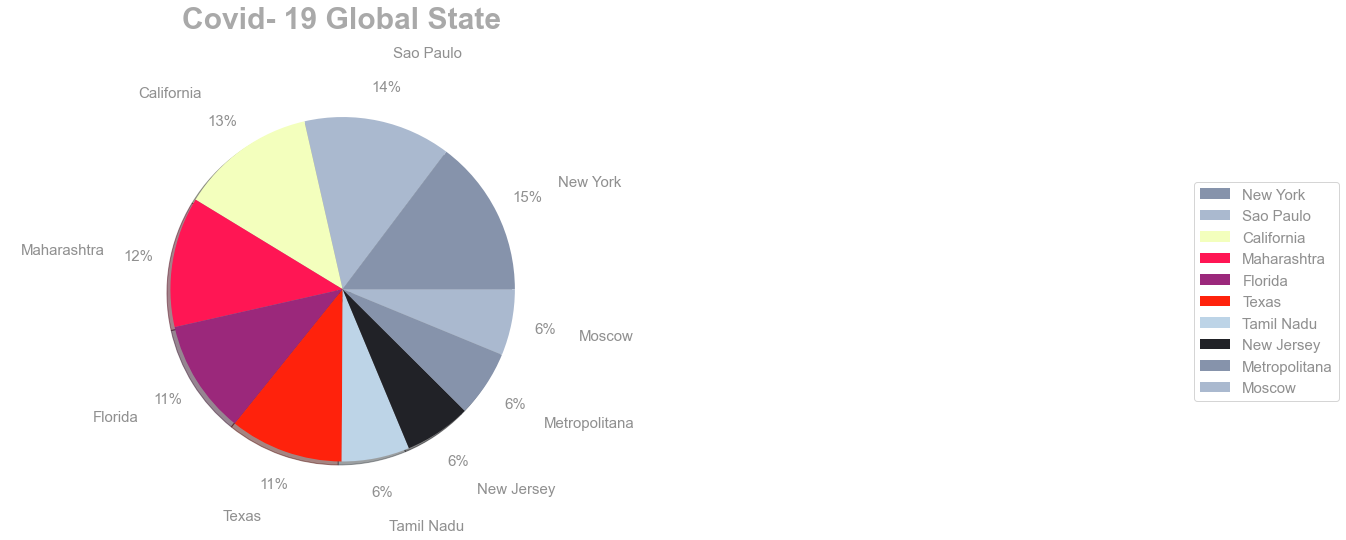

<Figure size 1440x1080 with 0 Axes>

In [58]:
fig, ax = plt.subplots(figsize = (12,7))

plt.figure(figsize =(20, 15)) 
plt.rcParams['font.sans-serif'] = 'Arial'
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['text.color'] = '#909090'
plt.rcParams['axes.labelcolor']= '#909090'
plt.rcParams['xtick.color'] = '#909090'
plt.rcParams['ytick.color'] = '#909090'
plt.rcParams['font.size']= 15

color_palette_list = ['#8693AB','#AAB9CF', '#F3FFBD', '#FF1654', '#9B287B', '#FF220C', '#BDD4E7', '#212227', '#637074',   
                       '#FF3622']

s_name = ['New York','Sao Paulo', 'California','Maharashtra','Florida','Texas','Tamil Nadu','New Jersey','Metropolitana','Moscow']

ax.pie(Top10_state, labels=s_name,  
       colors=color_palette_list[0:8], autopct='%1.0f%%', 
       shadow=True, startangle=0,   
       pctdistance=1.2,labeldistance=1.4)
ax.axis('equal')
ax.set_title("Covid- 19 Global State",fontsize = 30, pad = 70, fontweight ="bold")
ax.legend(frameon=True, bbox_to_anchor=(2,0.8))



In [60]:
India_data = dataset[dataset['Country/Region'] == 'India']
India_data_copy = India_data.copy()
India_data_copy.drop(India_data_copy[India_data_copy['Province/State'] == 'Unknown'].index, inplace = True) 

In [70]:
state_name = India_data.groupby('Province/State')['Confirmed'].sum()
state_name = state_name.to_frame()

In [85]:
Topstate_India = state_name['Confirmed'].nlargest(10)
Topstate_India

Province/State
Maharashtra       53940053.0
Tamil Nadu        28118938.0
Andhra Pradesh    23442531.0
Karnataka         19353593.0
Delhi             14492502.0
Uttar Pradesh     13579785.0
West Bengal        9706667.0
Telangana          7909147.0
Bihar              7595943.0
Gujarat            7003453.0
Name: Confirmed, dtype: float64

In [86]:
label = ['Maharashtra','Tamil Nadu','Andhra Pradesh','Karnataka','Delhi','Uttar Pradesh','West Bengal','Telangana','Bihar','Gujarat']

In [87]:
import seaborn as sns
sns.catplot(x=label, y=Topstate_India)


TypeError: object of type 'NoneType' has no len()

In [88]:
import plotly.express as px
fig = px.bar( x=label, y=Topstate_India)
fig.show()

In [9]:
data_recovered = recovered[['Country/Region','Lat', 'Long','10/11/20']]
data_recovered.shape

(254, 4)

In [13]:
temp = covid_19_data

In [100]:
fig = go.Figure(data=[
go.Bar(name='Deaths', x=temp['Date'], y=temp['Deaths'],marker_color='#ff0000'),
go.Bar(name='Recovered Cases', x=temp['Date'], y=temp['Cured'],marker_color='#2bad57'),
go.Bar(name='Confirmed Cases', x=temp['Date'], y=temp['Confirmed'],marker_color='#326ac7')])
fig.update_layout(barmode='stack')
fig.update_traces(textposition='inside')
fig.update_layout(uniformtext_minsize=8, uniformtext_mode='hide')
fig.update_layout(title_text='COVID-19 Cases,Recovery and Deaths in India from Feb till May',
                  plot_bgcolor='rgb(275, 270, 273)')
fig.show()

In [16]:
total_recovered = recovered_df['10/11/20'].sum(axis=0)
total_deaths = deaths_df['10/11/20'].sum(axis=0)
total_confirmed = confirmed_df['10/11/20'].sum(axis=0)
total_active = total_confirmed - (total_deaths + total_recovered)

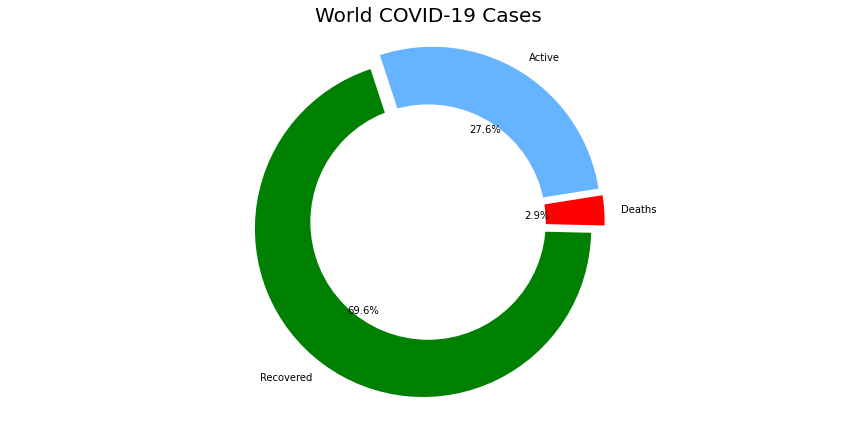

In [17]:
labels = ['Active','Recovered','Deaths']
sizes = [total_active,total_recovered,total_deaths]
color= ['#66b3ff','green','red']
explode = []


for i in labels:
    explode.append(0.05)
    
plt.figure(figsize= (12,6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=9, explode =explode,colors = color)
centre_circle = plt.Circle((0,0),0.70,fc='white')

fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.title('World COVID-19 Cases',fontsize = 20)
plt.axis('equal')  
plt.tight_layout()


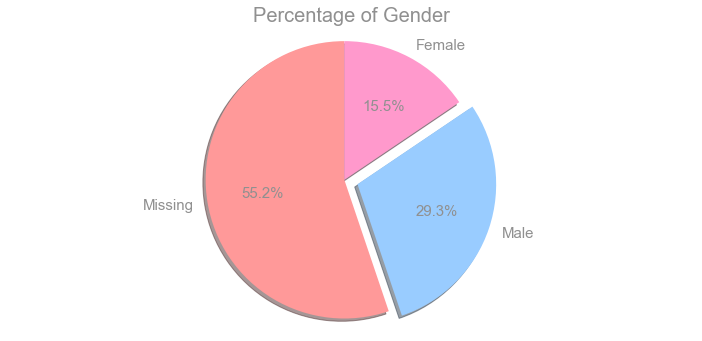

In [96]:
labels = ['Missing', 'Male', 'Female']
sizes = []
sizes.append(individual_details['Gender'].isnull().sum())
sizes.append(list(individual_details['Gender'].value_counts())[0])
sizes.append(list(individual_details['Gender'].value_counts())[1])

explode = (0, 0.1, 0)
colors = ['#ff9999','#99ccff','#ff99cc']

plt.figure(figsize= (10,5))
plt.title('Percentage of Gender',fontsize = 20)
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%',shadow=True, startangle=90)
plt.axis('equal')
plt.tight_layout()

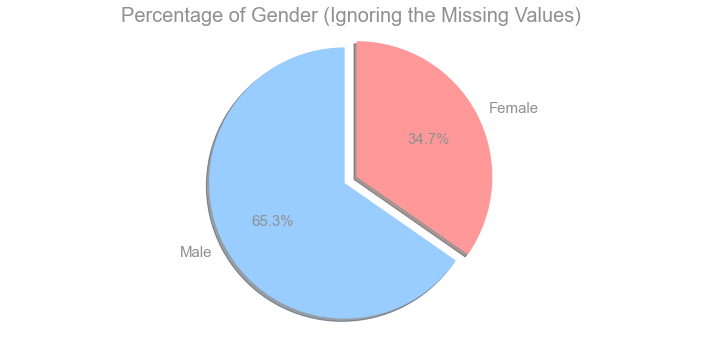

In [98]:
labels = ['Male', 'Female']
sizes = []
sizes.append(list(individual_details['Gender'].value_counts())[0])
sizes.append(list(individual_details['Gender'].value_counts())[1])

explode = (0.1, 0)
colors = ['#99ccff','#ff9999']

plt.figure(figsize= (10,5))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%',
        shadow=True, startangle=90)

plt.title('Percentage of Gender (Ignoring the Missing Values)',fontsize = 20)
plt.axis('equal')
plt.tight_layout()